Matrix Vector Multiplication
* dot() operator performs scaling and addition between basis matrix and vector. It is known as a dot product!

In [4]:
from numpy import array

# compose basis matrix with i-hat and j-hat
basis = array(
    [[3, 0],
     [0, 2]]
)

#declare vector v
v = array([1, 1])

# create new vector by transforming v with dot product
new_v = basis.dot(v)

print(new_v)


[3 2]


In [5]:
basis

array([[3, 0],
       [0, 2]])

In [ ]:
# Separating the basis vectors and applying them as a transformation

from numpy import array

# Declare i-hat and j-hat
i_hat = array([2, 0])
j_hat = array([0, 3])

# compose basis matrix using i-hat and j-hat 
# # also need to transpose rows into columns 
basis = array([i_hat, j_hat]).transpose()

# declare vector v
v = array([1,1])

# create new vector
# by transforming v with dot product 
new_v = basis.dot(v)

print(new_v) # [2, 3]
print(basis)

[2 3]
[[2 0]
 [0 3]]


Key Distinction of not transposing vs transposing:
* Rows + dot(v) → interpret as projecting onto the basis vectors
* Columns + @v → interpret as building the vector from basis vectors

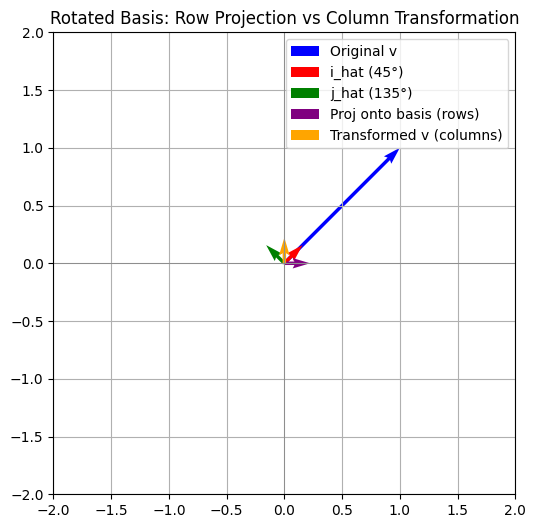

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 45° rotated basis
theta = np.pi / 4
i_hat = np.array([np.cos(theta), np.sin(theta)])  # rotated x-axis
j_hat = np.array([-np.sin(theta), np.cos(theta)])  # rotated y-axis

# Vector to transform
v = np.array([1, 1])

# A) Basis as rows: projection onto basis
basis_rows = np.array([i_hat, j_hat])
v_proj = basis_rows @ v  # row-wise dot (projections)

# B) Basis as columns: linear combination of basis vectors
basis_cols = np.column_stack((i_hat, j_hat))
v_transformed = basis_cols @ v  # classic matrix-vector

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Plot original vector
ax.quiver(0, 0, *v, angles='xy', scale_units='xy', scale=1, color='blue', label='Original v')

# Plot basis vectors
ax.quiver(0, 0, *i_hat, color='red', label='i_hat (45°)')
ax.quiver(0, 0, *j_hat, color='green', label='j_hat (135°)')

# Plot projections (row-wise dot product)
ax.quiver(0, 0, v_proj[0], v_proj[1], color='purple', label='Proj onto basis (rows)')

# Plot transformed vector (columns as basis)
ax.quiver(0, 0, *v_transformed, color='orange', label='Transformed v (columns)')

ax.legend()
plt.title("Rotated Basis: Row Projection vs Column Transformation")
plt.show()


Matrix Multiplication

In [ ]:
# Combining two transformations - use matmul() or @ !!

from numpy import array

# Transformation 1 - rotation
i_hat1 = array([0, 1])
j_hat1 = array([-1, 0])
transform1 = array([i_hat1, j_hat1]).transpose()

# Transformation 2 - sheer
i_hat2 = array([1, 0])
j_hat2 = array([1, 1])
transform2 = array([i_hat2, j_hat2]).transpose()

# Combine Transformations
combined = transform2 @ transform1 

# Test
print("COMBINED MATRIX:\n {}".format(combined)) 

v = array([1, 2])
print(f'Dot product : {combined.dot(v)}') # [-1, 1]

COMBINED MATRIX:
 [[ 1 -1]
 [ 1  0]]
Dot product : [-1  1]


We could have applied transformations individually, getting the same result:

In [27]:
rotated = transform1.dot(v)
sheered = transform2.dot(rotated)
print(sheered) # [-1, 1]

[-1  1]


Order of transformations matters! If we apply sheer first, the result will be different.\
Think of each transformation as a function, and we apply them from the innermost
to outermost just like nested function calls.

In [29]:
# Applying the transformations in reverse

from numpy import array

# Transformation 1
i_hat1 = array([0, 1])
j_hat1 = array([-1, 0])
transform1 = array([i_hat1, j_hat1]).transpose()

# Transformation 2
i_hat2 = array([1, 0])
j_hat2 = array([1, 1])
transform2 = array([i_hat2, j_hat2]).transpose()

# Combine Transformations, apply sheer first and then rotation
combined = transform1 @ transform2 

# Test
print("COMBINED MATRIX:\n {}".format(combined)) 

v = array([1, 2])
print(f'Dot product : {combined.dot(v)}') # [-2, 3]

COMBINED MATRIX:
 [[ 0 -1]
 [ 1  1]]
Dot product : [-2  3]


Determinants - measure how a linear transformation scales an area
* Determinants describe how much a sampled area in a vector space changes in scale with linear transformations

In [30]:
# Calculating a determinant
from numpy.linalg import det
from numpy import array

i_hat = array([3, 0])
j_hat = array([0, 2])
basis = array([i_hat, j_hat]).transpose()

determinant = det(basis)
print(determinant) # prints 6.0

6.0


Simple shears and rotations should not affect the determinant, as the area will not change

In [31]:
from numpy.linalg import det
from numpy import array

i_hat = array([1, 0])
j_hat = array([1, 1])
basis = array([i_hat, j_hat]).transpose()

determinant = det(basis)
print(determinant) # prints 1.0

1.0


The determinant tells you whether the transformation is linearly dependent.\
If you have a determinant of 0, that means all of the space has been squished into a lesser dimension.
* E.g. a 2D space is compressed into one dimension and a 3D space is compressed into two dimensions. The area and volume respectively in both cases are 0!

In [ ]:
# A determinant of zero
from numpy.linalg import det
from numpy import array

i_hat = array([-2, 1])
j_hat = array([3, -1.5])
basis = array([i_hat, j_hat]).transpose()

determinant = det(basis)
print(determinant) # prints 0.0

0.0
